In [1]:
# My notes from watching https://www.youtube.com/watch?v=PaCmpygFfXo
# The spelled-out intro to language modeling: building makemore by Andrej Karpathy

In [2]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# cast the bigram character level language modeling into neural network framework
# it receives a single character as input, then there is a neural network with some weights(parameters) w
# and then it will output the probability distribution over the next character in the sequence
# which character is likely to follow the input character?

In [4]:
# first create the training set of bigrams (x, y)
# we are given x, we are trying to predict y

xs, ys = [], []

words = open('names.txt', 'r').read().splitlines()

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}


# finally add the start / end token
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)      

. e
e m
m m
m a
a .


In [5]:
xs

tensor([ 0,  5, 13, 13,  1])

In [6]:
ys

tensor([ 5, 13, 13,  1,  0])

In [7]:
# for "emma", there are 5 separate input examples
# when the input is integer 0, the desired label is integer 5.
# when the input is 5, we want the weights to be arranged so that 13 gets a very high probability
# when 13 is input, we want 13 to have a high probability
# when 13 is input, we also want 1 to have a high probability
# when 1 is input, we want 0 to have a high probability

In [8]:
# there is torch.tensor
# there is torch.Tensor (tensor class that you can construct)
# what's the difference? 
# torch.tensor infers the dtype while torch.Tensor returns a float
# advised that you use torch.tensor

In [9]:
# One Hot Encoding

import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27).float()
# we want to cast to float for some reason to feed into the neural net

In [10]:
xenc.shape

torch.Size([5, 27])

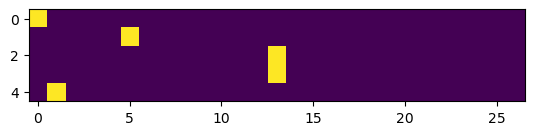

In [11]:
plt.imshow(xenc)

In [12]:
xenc.dtype

torch.float32

In [13]:
# Define the initial weights 
W = torch.randn((27, 1))

# @ is the matrix multiplication operator in PyTorch
xenc @ W

# (5, 27) @ (27, 1) becomes (5, 1)

# We see the 5 activations of this neuron on these 5 inputs. 
# We evaluated all 5 in parallel

tensor([[ 0.1818],
        [ 1.0574],
        [-1.6936],
        [-1.6936],
        [-0.2548]])

In [14]:
# Define the initial weights - but now use 27
W = torch.randn((27, 27))

# @ is the matrix multiplication operator in PyTorch
xenc @ W

# (5, 27) @ (27, 27) -> (5, 27)

tensor([[ 1.4377,  0.5300, -0.7810,  1.3994, -0.7344, -0.3805, -0.0635,  2.6279,
          0.5014, -0.4229, -0.1932,  0.1376, -2.1939, -1.0828, -0.1622,  0.6783,
          0.1765, -0.1066, -0.1666, -2.1751,  1.1102,  1.9043, -0.4629, -1.4501,
         -0.0537,  0.5480, -0.8174],
        [-0.7962, -0.2061, -0.6220,  0.2610,  0.3534, -1.4845,  0.3060,  0.2525,
         -1.2855, -1.2617,  1.2533,  0.3231,  1.6391,  0.3305, -1.5431, -2.1455,
         -0.4458,  0.8281, -0.2135, -0.7406,  0.2737, -0.9459,  0.0191, -0.9473,
         -1.9009, -0.1800, -1.1357],
        [ 0.2377,  1.6512, -0.2919, -0.0889,  1.1622, -0.7896, -1.0883,  1.2449,
         -0.9099, -1.4007, -0.3196,  0.3046, -1.0319,  0.6429, -3.0464,  1.2666,
          2.8703,  1.3266,  0.8574,  0.4311,  0.7702, -1.2435, -1.9238, -0.7378,
         -1.3359,  0.1369, -0.3770],
        [ 0.2377,  1.6512, -0.2919, -0.0889,  1.1622, -0.7896, -1.0883,  1.2449,
         -0.9099, -1.4007, -0.3196,  0.3046, -1.0319,  0.6429, -3.0464,  1.2666

In [15]:
(xenc @ W).shape

torch.Size([5, 27])

In [16]:
# for every 27 neurons, what is the firing rate 

# example
(xenc @ W)[3, 13] # is giving us the firing rate of the 13th neuron looking at the 3rd input 
# it was achieved using the dot product 

tensor(0.6429)

In [17]:
xenc[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
W[:,  13]

tensor([-1.0828,  1.3751,  1.5616, -0.8406, -1.2671,  0.3305,  0.9033, -0.0066,
         1.9868, -0.5488,  0.4259, -1.3165, -1.6594,  0.6429,  0.4055, -0.0476,
        -0.6964,  0.5815,  0.3601,  1.2575,  0.2349, -0.0515, -1.4433, -1.4497,
        -0.4865,  1.9008, -1.8381])

In [19]:
(xenc[3] * W[:, 13]).sum() # the dot product

tensor(0.6429)

In [20]:
# neural net outputs the log counts
# to get the counts, you need to exponentiate the log counts

# exponent (exp(x) 
# element-wise exponent of each, they turn into positive numbers
# all the negative numbers turned into numbers below 1
# all the positive numbers turned into even more positive numbers (above 1)

(xenc @ W).exp()

tensor([[ 4.2111,  1.6989,  0.4579,  4.0526,  0.4798,  0.6836,  0.9385, 13.8445,
          1.6510,  0.6552,  0.8244,  1.1476,  0.1115,  0.3387,  0.8502,  1.9705,
          1.1931,  0.8989,  0.8465,  0.1136,  3.0350,  6.7150,  0.6294,  0.2345,
          0.9478,  1.7297,  0.4416],
        [ 0.4511,  0.8137,  0.5369,  1.2983,  1.4239,  0.2266,  1.3580,  1.2872,
          0.2765,  0.2832,  3.5020,  1.3814,  5.1506,  1.3917,  0.2137,  0.1170,
          0.6403,  2.2889,  0.8078,  0.4768,  1.3148,  0.3883,  1.0193,  0.3878,
          0.1494,  0.8353,  0.3212],
        [ 1.2683,  5.2134,  0.7469,  0.9150,  3.1968,  0.4540,  0.3368,  3.4724,
          0.4026,  0.2464,  0.7264,  1.3560,  0.3563,  1.9020,  0.0475,  3.5487,
         17.6420,  3.7682,  2.3571,  1.5389,  2.1601,  0.2884,  0.1461,  0.4782,
          0.2629,  1.1467,  0.6859],
        [ 1.2683,  5.2134,  0.7469,  0.9150,  3.1968,  0.4540,  0.3368,  3.4724,
          0.4026,  0.2464,  0.7264,  1.3560,  0.3563,  1.9020,  0.0475,  3.5487

In [21]:
logits = xenc @ W # log-counts 
counts = logits.exp() # this is equivalent to N from the bigram notebook
probs = counts / counts.sum(1, keepdims=True) # probabilities are just the counts normalized
probs

tensor([[0.0831, 0.0335, 0.0090, 0.0799, 0.0095, 0.0135, 0.0185, 0.2731, 0.0326,
         0.0129, 0.0163, 0.0226, 0.0022, 0.0067, 0.0168, 0.0389, 0.0235, 0.0177,
         0.0167, 0.0022, 0.0599, 0.1324, 0.0124, 0.0046, 0.0187, 0.0341, 0.0087],
        [0.0159, 0.0287, 0.0189, 0.0458, 0.0502, 0.0080, 0.0479, 0.0454, 0.0098,
         0.0100, 0.1236, 0.0487, 0.1817, 0.0491, 0.0075, 0.0041, 0.0226, 0.0808,
         0.0285, 0.0168, 0.0464, 0.0137, 0.0360, 0.0137, 0.0053, 0.0295, 0.0113],
        [0.0232, 0.0954, 0.0137, 0.0167, 0.0585, 0.0083, 0.0062, 0.0635, 0.0074,
         0.0045, 0.0133, 0.0248, 0.0065, 0.0348, 0.0009, 0.0649, 0.3227, 0.0689,
         0.0431, 0.0282, 0.0395, 0.0053, 0.0027, 0.0087, 0.0048, 0.0210, 0.0125],
        [0.0232, 0.0954, 0.0137, 0.0167, 0.0585, 0.0083, 0.0062, 0.0635, 0.0074,
         0.0045, 0.0133, 0.0248, 0.0065, 0.0348, 0.0009, 0.0649, 0.3227, 0.0689,
         0.0431, 0.0282, 0.0395, 0.0053, 0.0027, 0.0087, 0.0048, 0.0210, 0.0125],
        [0.0921, 0.0233,

In [22]:
# in probs, every row will sum to 1, since they are normalized
probs[0].sum()

tensor(1.0000)

In [23]:
probs.shape
# for every one of our 5 examples, we now have a row that came out of a neural net, and because of the transformations 
# we made sure we can interpret the results to be probabilities



torch.Size([5, 27])

In [24]:
probs[0]
# how likely every one of these characters is to come next in the sequence after '.'

tensor([0.0831, 0.0335, 0.0090, 0.0799, 0.0095, 0.0135, 0.0185, 0.2731, 0.0326,
        0.0129, 0.0163, 0.0226, 0.0022, 0.0067, 0.0168, 0.0389, 0.0235, 0.0177,
        0.0167, 0.0022, 0.0599, 0.1324, 0.0124, 0.0046, 0.0187, 0.0341, 0.0087])

In [25]:
# Can we find a good W so that we get good probabilities?
# 

In [26]:
##### SUMMARY

In [27]:
xs

tensor([ 0,  5, 13, 13,  1])

In [28]:
ys

tensor([ 5, 13, 13,  1,  0])

In [29]:
# randomly initialize 27 neuron's weights. each neuron receives 27 inputs.
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [30]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict the log counts
counts = logits.exp() # get the counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw the last two lines here are together called a 'softmax'

In [31]:
probs.shape

torch.Size([5, 27])

In [32]:

nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    print('-----')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned by the neural net to the correct character', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll
    
print('=====')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

    
    
    
    
    

-----
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the neural net to the correct character 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488
-----
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the neural net to the correct character 0.01

In [36]:
# stopped at 1:31:48